In [1]:
!pip install import-ipynb
!pip install timm

In [2]:
#%cd /content/drive/MyDrive/NLP



# TensorBoard를 사용하면 손실 및 정확도와 같은 측정 항목을 추적 및 시각화하는 것, 모델 그래프를 시각화하는 것, 히스토그램을 보는 것, 이미지를 출력하는 것 등이 가능
import import_ipynb
import torch.utils.tensorboard as tensorboard 
import numpy as np

import os

from vision_model_final import Mini_Xception,NN,ResNet34
from vision_dataset_final import create_train_dataloader, create_val_dataloader

import torch
import torch.nn as nn
import torch.optim

from sklearn.metrics import accuracy_score
import random

importing Jupyter notebook from vision_model_final.ipynb
importing Jupyter notebook from vision_dataset_final.ipynb


C:\Users\user\anaconda3\envs\ml\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
torch.cuda.empty_cache()

**잠깐 ✔ 랜덤시드 고정이란 무엇인가?**
> 학습된 모델의 결과를 동일하게 재현(Reproduction)하는 것은 여러가지 상황에서 팔요합니다.  
> 모델을 돌릴 때마다 결과가 달라지지 않도록 고정하는 것입니다.

- 수상자가 되어 코드의 정합성을 검증 받게 될 경우,

- 경진대회 참가 도중 팀을 이루어 결과를 공유해야 되는 경우,

- 논문을 작성하여 그 결과를 Reproduction 해야하는 경우 등 여러 상황에서 필요합니다.

참고 자료:
https://dacon.io/codeshare/2363
https://pytorch.org/docs/stable/notes/randomness.html

In [4]:
seed_val = 2022
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [5]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.nn.modules.loss import _WeightedLoss

import math
import torch
from torch import nn
from torch.nn import Parameter
import torch.nn.functional as F

class FocalLoss(nn.modules.loss._WeightedLoss):
    def __init__(self, weight=None, gamma=2,reduction='mean'):
        super(FocalLoss, self).__init__(weight,reduction=reduction)
        self.gamma = gamma
        self.weight = weight #weight parameter will act as the alpha parameter to balance class weights

    def forward(self, input, target):

        ce_loss = F.cross_entropy(input, target,reduction=self.reduction,weight=self.weight)
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma * ce_loss).mean()
        return focal_loss
    

Training!

========1번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 1 .. Train loss = 1.01 Train Accuracy = 0.38 

검증 중
Val loss = 1.55 .. Val Accuracy = 0.42 
Val loss = 1.59 .. Val Accuracy = 0.42 

========2번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 2 .. Train loss = 0.67 Train Accuracy = 0.51 

검증 중
Val loss = 1.39 .. Val Accuracy = 0.46 
Val loss = 1.42 .. Val Accuracy = 0.46 

========3번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 3 .. Train loss = 0.55 Train Accuracy = 0.56 

검증 중
Val loss = 1.33 .. Val Accuracy = 0.48 
Val loss = 1.32 .. Val Accuracy = 0.48 

========4번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 4 .. Train loss = 0.49 Train Accuracy = 0.59 

검증 중
Val loss = 1.23 .. Val Accuracy = 0.54 
Val loss = 1.23 .. Val Accuracy = 0.54 

========5번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 5 .. Train loss = 0.44 Train Accuracy = 0.60 

검증 중
Val loss = 1.17 .. Val Accuracy = 0.57 
Val loss = 1.19 .. Val Accuracy = 0.57 

========6번째 Epoch / 전체 200회 =

Val loss = 1.73 .. Val Accuracy = 0.66 

========43번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 43 .. Train loss = 0.00 Train Accuracy = 0.97 

검증 중
Val loss = 1.67 .. Val Accuracy = 0.66 
Val loss = 1.68 .. Val Accuracy = 0.66 

========44번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 44 .. Train loss = 0.00 Train Accuracy = 0.97 

검증 중
Val loss = 1.80 .. Val Accuracy = 0.66 
Val loss = 1.74 .. Val Accuracy = 0.66 

========45번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 45 .. Train loss = 0.00 Train Accuracy = 0.97 

검증 중
Val loss = 1.67 .. Val Accuracy = 0.66 
Val loss = 1.72 .. Val Accuracy = 0.66 

========46번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 46 .. Train loss = 0.00 Train Accuracy = 0.97 

검증 중
Val loss = 1.75 .. Val Accuracy = 0.66 
Val loss = 1.75 .. Val Accuracy = 0.66 

========47번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 47 .. Train loss = 0.00 Train Accuracy = 0.97 

검증 중
Val loss = 1.77 .. Val Accuracy = 0.66 
Val loss = 1.76 .. Val Accurac

Val loss = 1.88 .. Val Accuracy = 0.66 
Epoch 00083: reducing learning rate of group 0 to 1.0011e-03.
Val loss = 1.85 .. Val Accuracy = 0.66 

========84번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 84 .. Train loss = 0.00 Train Accuracy = 0.98 

검증 중
Val loss = 1.97 .. Val Accuracy = 0.66 
Val loss = 1.85 .. Val Accuracy = 0.66 

========85번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 85 .. Train loss = 0.00 Train Accuracy = 0.98 

검증 중
Val loss = 1.85 .. Val Accuracy = 0.66 
Val loss = 1.81 .. Val Accuracy = 0.66 

========86번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 86 .. Train loss = 0.00 Train Accuracy = 0.98 

검증 중
Val loss = 1.81 .. Val Accuracy = 0.66 
Val loss = 1.86 .. Val Accuracy = 0.66 

========87번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 87 .. Train loss = 0.00 Train Accuracy = 0.98 

검증 중
Val loss = 1.92 .. Val Accuracy = 0.66 
Val loss = 1.88 .. Val Accuracy = 0.66 

========88번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 88 .. Train loss = 0.

Val loss = 1.82 .. Val Accuracy = 0.66 
Val loss = 1.89 .. Val Accuracy = 0.66 

========124번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 124 .. Train loss = 0.00 Train Accuracy = 0.98 

검증 중
Val loss = 1.89 .. Val Accuracy = 0.66 
Val loss = 1.93 .. Val Accuracy = 0.66 

========125번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 125 .. Train loss = 0.00 Train Accuracy = 0.98 

검증 중
Val loss = 1.88 .. Val Accuracy = 0.66 
Epoch 00125: reducing learning rate of group 0 to 1.3363e-04.
Val loss = 1.92 .. Val Accuracy = 0.66 

========126번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 126 .. Train loss = 0.00 Train Accuracy = 0.98 

검증 중
Val loss = 1.83 .. Val Accuracy = 0.66 
Val loss = 2.02 .. Val Accuracy = 0.66 

========127번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 127 .. Train loss = 0.00 Train Accuracy = 0.98 

검증 중
Val loss = 1.91 .. Val Accuracy = 0.66 
Val loss = 1.86 .. Val Accuracy = 0.66 

========128번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 128 .. Train

training @ epoch 163 .. Train loss = 0.00 Train Accuracy = 0.98 

검증 중
Val loss = 1.98 .. Val Accuracy = 0.66 
Val loss = 1.85 .. Val Accuracy = 0.66 

========164번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 164 .. Train loss = 0.00 Train Accuracy = 0.98 

검증 중
Val loss = 1.91 .. Val Accuracy = 0.66 
Val loss = 1.85 .. Val Accuracy = 0.66 

========165번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 165 .. Train loss = 0.00 Train Accuracy = 0.98 

검증 중
Val loss = 1.95 .. Val Accuracy = 0.66 
Val loss = 1.93 .. Val Accuracy = 0.66 

========166번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 166 .. Train loss = 0.00 Train Accuracy = 0.98 

검증 중
Val loss = 1.82 .. Val Accuracy = 0.66 
Val loss = 1.93 .. Val Accuracy = 0.66 

========167번째 Epoch / 전체 200회 ========
훈련 중
training @ epoch 167 .. Train loss = 0.00 Train Accuracy = 0.98 

검증 중
Val loss = 2.01 .. Val Accuracy = 0.66 
Epoch 00167: reducing learning rate of group 0 to 1.7838e-05.
Val loss = 1.86 .. Val Accuracy = 0.66 

==

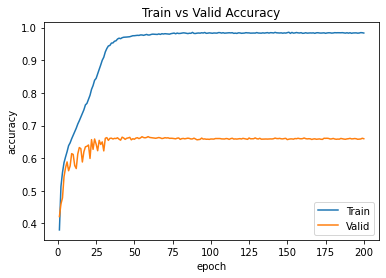

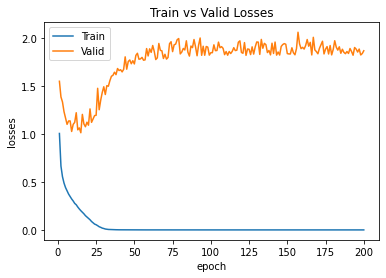

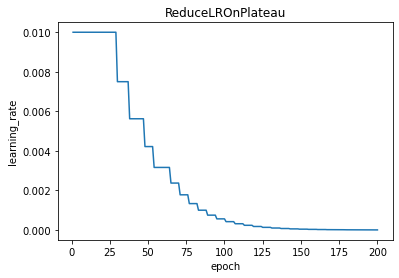

In [6]:
from torch.autograd import Variable
import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# tensorboard 만들기(epoch마다 loss와 정확도 변화의 경향을 파악하는 데 좋다.) -> 선택 사항
writer = tensorboard.SummaryWriter('checkpoint/model_weights_Res/')
# 모델 정의하기
## 여기에 코드 작성
# 모델 학습 파라미터 지정 # todo code
learning_rate = 1e-2 # 무조건 작다고 좋지 않다.
epochs = 200

model = ResNet34()  # 모델 instantiation for training
# 옵티마이저 정의
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate
                            ,nesterov=True,momentum=0.9,weight_decay=1e-6)


scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', 
                                            factor=0.75, patience=5,verbose=True)

loss_fn = FocalLoss()

model.zero_grad() # 그래디언트 초기화
PATH = "./checkpoint/model_weights_Res/weights_epoch_"

#image_size=[128,192,224,380]
#magnitude=[5,10,15,20]
def main(): # 코드가 실행될 main 함수를 만들어봅시다.
    
    train_accs=[]
    train_losses=[]
    val_losses=[]
    val_accs=[]
    lrs=[]
    train_dataloader =create_train_dataloader(batch_size=128)
    val_dataloader = create_val_dataloader(batch_size=128)

    print("Training!")
    
    
    for epoch in range(0, epochs):
        train_loss,train_acc = train(model,   train_dataloader,epoch)
        val_loss, val_acc= validation(model,  val_dataloader, epoch)
        
        scheduler.step(val_acc)
        lrs.append(
        optimizer.param_groups[0]["lr"]
        )
        train_accs.append(train_acc)
        train_losses.append(train_loss)
        val_accs.append(val_acc)
        val_losses.append(val_loss)
        
        
        final_loss, val_acc=validation(model,val_dataloader,epoch)
        # 매 epoch 마다 checkpoint로 model을 저장할 필요가 있습니다.
        # https://tutorials.pytorch.kr/recipes/recipes/saving_and_loading_a_general_checkpoint.html
        ## 여기에 코드 작성
        writer.add_scalar('train_loss',train_loss, epoch)
        writer.add_scalar('val_loss',val_loss, epoch)
        writer.add_scalar('val_acc',val_acc, epoch)

        checkpoint_state = {
                'Res': model.state_dict(),
                "epoch": epoch
            }
        torch.save(checkpoint_state, PATH+str(epoch+1)+'.pth.tar')

    plt.figure(1)
    plt.plot(np.arange(1,epochs+1),train_accs)
    plt.plot(np.arange(1,epochs+1),val_accs)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['Train','Valid'])
    plt.title('Train vs Valid Accuracy')
    
    plt.savefig('Res_Accuracy_graph.png',
            format='png', dpi=200)
    plt.figure(2)
    plt.plot(np.arange(1,epochs+1),train_losses)
    plt.plot(np.arange(1,epochs+1),val_losses)
    plt.xlabel('epoch')
    plt.ylabel('losses')
    plt.legend(['Train','Valid'])
    plt.title('Train vs Valid Losses')

    
    plt.savefig('Res_Loss_graph.png',
            format='png', dpi=200)
    
    
    
    plt.figure(3)
    plt.plot(np.arange(1,epochs+1),lrs)
    plt.xlabel('epoch')
    plt.ylabel('learning_rate')
    plt.title('ReduceLROnPlateau')
    plt.savefig('Res_learning_rate.png',
            format='png', dpi=200)
    
    
    
    
    
    writer.close() # Tensorboard 닫기


# epoch 마다 train하는 코드 -> 정확도를 얻는 코드(중간미션에서 with torch.no_grad()로 작성하였던 부분)를 작성해야 합니다.
# train_loss을 얻는 함수와 정확도를 얻는 함수를 각각 작성하는 것이 편리합니다.
# loss = criterion(input,label)로 손실을 구할 수 있습니다. 이때 lnput과 label의 shape을 고려해야 합니다.
# input = (minibatch,7) -> 감정이 7개의 class이므로 / label = (minibatch, )의 shape을 가집니다.
# ***따라서 criterion을 이용해 loss을 구하기 전 input의 shape을 (minibatch,7)이 아니라면 꼭 이 shape으로 바꿔주어야 합니다! -> squeeze 함수 시용해보기
# 알면 좋은 정보: from sklearn.metrics import accuracy_score을 통해 accuracy_score(label,prediction)로 정확도를 얻을 수 있습니다.

def train(model, dataloader, epoch): # train 과정에서의 손실을 계산하는 함수 작성
    model.train()
    model.to(device)
    ## 여기에 코드 작성
    # 더 필요한 변수나 작업이 있다면 작성해봅시다. 정해진 틀은 없으며 자유롭게 작성하시면 됩니다. loss나 optimizer로 어떤 것을 사용할건지 등..
    
    losses = []
    train_total_pred = []
    train_total_labels = []
    print("")
    print('========{:}번째 Epoch / 전체 {:}회 ========'.format(epoch + 1, epochs))
    print('훈련 중')
    
    for images, labels in dataloader:
        ## 여기에 코드 작성
        images = images.to(device)
        labels = labels.to(device)
        
        
        
        
        outputs = model(images)
        
        loss = loss_fn(outputs,labels)
        
        
        
        
        optimizer.zero_grad()
        losses.append(loss.cpu().item())
        loss.backward()
        
        optimizer.step()
        
        _, indexes = torch.max(outputs, axis=1)
        
        train_total_pred.extend(indexes.cpu().detach().numpy())
        train_total_labels.extend(labels.cpu().detach().numpy())
        
    
        ## 여기에 코드 작성
        # back propagation을 떠올려보며 train 코드를 마무리하기
    # 평균 로스 계산
    Train_loss = np.mean(losses).item()
    Train_acc = accuracy_score(train_total_labels, train_total_pred)
    
    print(f'training @ epoch {epoch+1} .. Train loss = {Train_loss:.2f} Train Accuracy = {Train_acc:.2f} ')
    
    #### 검증 ####
    
    print("")
    print("검증 중")

    return Train_loss,Train_acc

def validation(model, dataloader, epoch): 
  # 중간미션 1에서 with torch.no_grad(): 부분에 작성하였던 test accuracy를 구하는 방법을 떠올려보면 됩니다. 
  # train 과정에서의 손실도 중요하나 최종적으로 random data을 넣어서 test를 한 후의 정확도를 얻어야 합니다.
    model.eval() # 왜 설정할까요?
    model.to(device)
    ## 여기에 코드 작성
    # 변수 필요한거 설정 (loss로 어떤걸 사용할건지 등)
    losses = []

    val_total_pred = []
    val_total_labels = []

    with torch.no_grad(): 
        # 학습이 x 모델 성능 평가 따라서 autograd하지 않음!!
        correct = 0 # 맞은 개수 세기 위해 int 정의
        total = 0 # 전체 실행 개수를 세서 정확도를 계산하기 위해 int 정의
        for images, labels in dataloader:
            minibatch = images.shape[0]
            images = images.to(device)
            labels = labels.to(device)
                    
            # 이제 images을 모델에 통과시켜 얻은 예측값으로 loss을 구해야 합니다.
            # 이를 criterion 함수에 넣기 위해선 먼저 예측값을 (minibatch, # of class)의 형태로 shape을 맞춰주어야 합니다. minibatch의 수를 알 수 있다면 편합니다!
            ## 여기에 코드 작성
            
            outputs = model(images)
            outputs=torch.squeeze(outputs)
            outputs = outputs.reshape(minibatch, -1)
            loss = nn.CrossEntropyLoss()(outputs,labels)
            losses.append(loss.cpu().item())
            
            
            # 이제 model을 거쳐 얻은 텐서에서 가장 큰 값을 갖는 곳의 index을 알아야 emotion이 무엇인지 알 수 있습니다.
            # index을 구해보고 이를 통해 index와 label간 차이로 정확도를 구합시다. 참고: https://pytorch.org/docs/stable/generated/torch.max.html
            # Scikit learn의 accuracy_score을 이용하고 싶다면 어떤식으로 예측값과 정답을 처리해야 할 지 고민해 봅시다.
            ## 여기에 코드 작성
            _, indexes = torch.max(outputs, axis=1)
            # print(indexes.shape, labels.shape)
            val_total_pred.extend(indexes.cpu().detach().numpy())
            val_total_labels.extend(labels.cpu().detach().numpy())
            
            
        val_loss = np.mean(losses).item()
        val_acc = accuracy_score(val_total_labels, val_total_pred)

        # 최종 loss와 정확도(소수점 넷째 자리까지)를 출력해봅시다. 
        print(f'Val loss = {val_loss:.2f} .. Val Accuracy = {val_acc:.2f} ')

        return val_loss, val_acc

if __name__ == "__main__": # 앞서 작성한 main 함수 실행
    main()


In [7]:
!pip install seaborn

In [8]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()
torch.cuda.memory_reserved()

738197504

0.6579831183771002


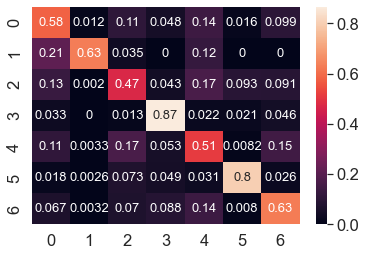

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
from sklearn.metrics import f1_score



y_pred = []
y_true = []
val_dataloader = create_val_dataloader(batch_size=8)
# iterate over test data
with torch.no_grad(): 
    for images, labels in val_dataloader:
        minibatch = images.shape[0]
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        output = (torch.max(torch.exp(outputs), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
      
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth



# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred,normalize='true')
df_cm = pd.DataFrame(cf_matrix, range(7), range(7))
sn.set(font_scale=1.5) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 13}) # font size
plt.savefig('Res_output.png')

f1=f1_score(y_true, y_pred, average='weighted')
print(f1)

In [10]:
# 저장해놓은 텐서보드 로드하기(in colab) - loss와 accuracy의 경향 확인
%load_ext tensorboard
%tensorboard --logdir ./checkpoint/model_weights

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
C:\Users\user\anaconda3\envs\ml\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\envs\ml\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\user\anaconda3\envs\ml\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\user\anaconda3\envs\ml\Scripts\tensorboard.exe\__main__.py", line 7, in <module>
  File "C:\Users\user\anaconda3\envs\ml\lib\site-packages\tensorboard\main.py", line 46, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "C:\Users\user\anaconda3\envs\ml\lib\site-packages\absl\app.py", line 308, in run
    _run_main(main, args)
  File "C:\U